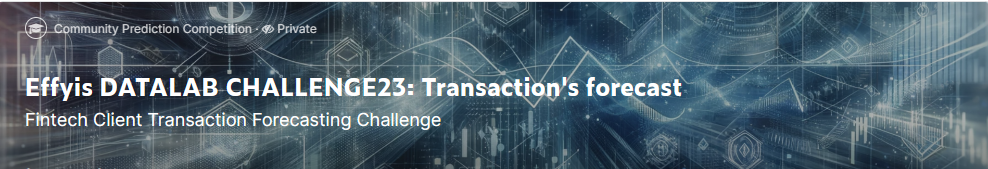

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor #pip install xgboost
from sklearn.metrics import mean_squared_error

# Step 1: Load and Explore Data

In [33]:
data = pd.read_csv('data/input/train_test_data.csv')

In [34]:
print(data.head())

                  Date   Id_compte  amount_transaction  \
0  2022-01-01 00:23:00   SEWC_CL.1              462.96   
1  2022-01-01 00:26:00  SEW0C_LI.1               15.51   
2  2022-01-01 01:01:00        US.1                2.24   
3  2022-01-01 01:21:00        TA.1                2.86   
4  2022-01-01 01:54:00        US.1                1.68   

                           category_transaction  
0                      Food & Drink - Groceries  
1  General Services - Home Repair + Maintenance  
2              Bank Transfers - ATM withdrawals  
3             Transportation - Public Transport  
4              Bank Transfers - ATM withdrawals  


In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20411 entries, 0 to 20410
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20411 non-null  object 
 1   Id_compte             20411 non-null  object 
 2   amount_transaction    20411 non-null  float64
 3   category_transaction  20411 non-null  object 
dtypes: float64(1), object(3)
memory usage: 638.0+ KB
None


In [36]:
print(data.describe())

       amount_transaction
count        20411.000000
mean            56.955119
std            150.401661
min              0.230000
25%              2.790000
50%              4.700000
75%              8.790000
max           2005.200000


# Step 2: Data Cleaning and Preprocessing

Handle missing values, outliers, encode categorical variables, etc.

# Step 3: Feature Engineering

Create new features or transform existing ones

In [37]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')

In [38]:
le = LabelEncoder()
data['Id_compte_encoded'] = le.fit_transform(data['Id_compte'])
data['category_transaction_encoded'] = le.fit_transform(data['category_transaction'])

In [39]:
# Extracting year, month, and day as features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Step 4: Data Splitting

In [63]:
X = data[['Id_compte_encoded', 'Year', 'Month', 'Day', 'category_transaction_encoded']]
y = data['amount_transaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection

In [69]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [70]:
X_train

Id_compte_encoded  Year  Month  Day  category_transaction_encoded
15734                  0  2022      8   28                             4
6245                   9  2022      4    6                            61
9352                   8  2022      5   23                            52
10507                  2  2022      6    9                            39
1457                   3  2022      1   23                             0
...                  ...   ...    ...  ...                           ...
11284                 10  2022      6   21                            10
11964                 11  2022      7    1                            19
5390                   3  2022      3   24                             0
860                   11  2022      1   14                            19
15795                  9  2022      8   29                            64

[16328 rows x 5 columns]

In [71]:
y_train

15734      4.70
6245       2.66
9352      17.41
10507    321.97
1457       6.68
          ...  
11284    171.36
11964      1.12
5390       6.68
860        1.68
15795     26.63
Name: amount_transaction, Length: 16328, dtype: float64

# Step 6: Model Training

In [72]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [73]:
# Step 7: Model Evaluation

In [78]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

2314.648835679711

In [79]:
# Step 8: Hyperparameter Tuning

In [80]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [81]:
# Step 9: Model Testing

In [82]:
y_test_pred = best_model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))

ValueError: continuous is not supported

In [61]:
# Step 10: Deployment

- Assuming you are satisfied with the model, deploy it for production use
- Save the model and necessary preprocessing steps

In [62]:
joblib.dump(best_model, 'your_model.joblib')

['your_model.joblib']

- Save other preprocessing steps if needed

# Step 11: Monitoring and Maintenance

Implement mechanisms for monitoring model performance and retraining if necessary

# Step 12: Documentation

Document the entire process, including code comments and a README file

# Step 13: Communication

Share your findings and insights with stakeholders